## В этом модуле, мы разберемся с задачей, начнем исследовать данные

Описание данных:

events_train.csv - данные о действиях, которые совершают студенты со стэпами

step_id - id стэпа
user_id - анонимизированный id юзера
timestamp - время наступления события в формате unix date
action - событие, возможные значения: 
discovered - пользователь перешел на стэп
viewed - просмотр шага,
started_attempt - начало попытки решить шаг, ранее нужно было явно нажать на кнопку - начать решение, перед тем как приступить к решению практического шага
passed - удачное решение практического шага
submissions_train.csv - данные о времени и статусах сабмитов к практическим заданиям

step_id - id стэпа
timestamp - время отправки решения в формате unix date
submission_status - статус решения
user_id - анонимизированный id юзера

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
events_data = pd.read_csv('C:/Users/Desktop/ML_Stepik/event_data_train.csv') #указываете свой путь
events_data.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [6]:
events_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

'viewed' - посмотреть, 'passed' - решить, 'discovered' - впервые увидеть, 'started_attempt' - начать решать

In [8]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit = 's')
events_data.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [9]:
events_data.dtypes

step_id               int64
timestamp             int64
action               object
user_id               int64
date         datetime64[ns]
dtype: object

In [10]:
events_data.date.min()

Timestamp('2015-06-15 04:00:48')

In [11]:
events_data.date.max()

Timestamp('2018-05-19 23:33:31')

In [14]:
events_data['day'] = events_data.date.dt.date
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


##### Сколько человек и в какой день записалось

In [15]:
events_data.groupby('day') \
.user_id.nunique().head()

day
2015-06-15    705
2015-06-16    526
2015-06-17    440
2015-06-18    411
2015-06-19    377
Name: user_id, dtype: int64

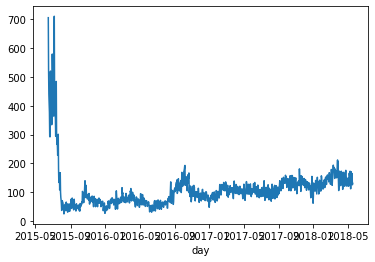

In [16]:
events_data.groupby('day') \
.user_id.nunique().plot()

In [17]:
# Надстройка для изменения размера графика
sns.set(rc={'figure.figsize': (9,6)}) 

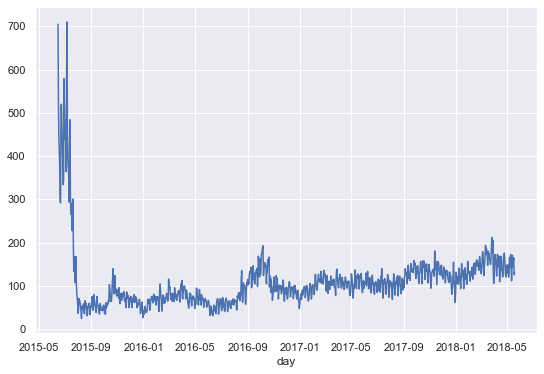

In [18]:
events_data.groupby('day') \
.user_id.nunique().plot()

#### Распределение пользователей по количеству баллов

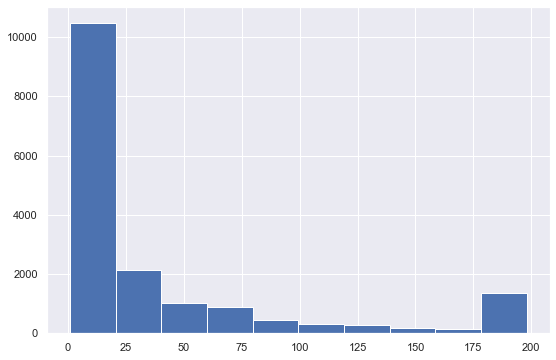

In [19]:
events_data[events_data.action == 'passed'] \
    .groupby('user_id', as_index = False) \
    .agg({'step_id': 'count'}) \
    .rename(columns = {'step_id': 'passed_step'}).passed_step.hist()

In [20]:
events_data[events_data.action == 'passed'] \
    .groupby('user_id', as_index = False) \
    .agg({'step_id': 'count'}) \
    .rename(columns = {'step_id': 'passed_step'}).passed_step.min()

1

In [21]:
# включаем 0 в выборку
events_data.pivot_table(index='user_id', 
                        columns='action', 
                        values='step_id', 
                        aggfunc='count', 
                        fill_value=0).reset_index().head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


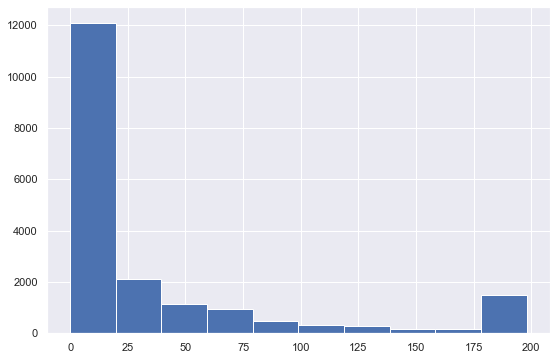

In [22]:
events_data.pivot_table(index='user_id', 
                        columns='action', 
                        values='step_id', 
                        aggfunc='count', 
                        fill_value=0).reset_index().discovered.hist()